In [532]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

In [76]:
## I. Load and Describe the data
data = pd.read_csv("./input/train.csv")
#data
#data.columns
#data.head()
#data.loc[2]
#print(data.isnull().values.any())
data.describe()
#data.shape

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8600.000000,8600.000000,8600.000000,8600.00000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,2.505581,0.027791,0.682558,1.41000,20.119653,23.560989,61.590581,12.756693,35.689419,154.840814,190.530233
std,1.116628,0.164382,0.465508,0.63234,8.000975,8.690173,19.468443,8.209822,49.571896,150.760096,180.631042
min,1.000000,0.000000,0.000000,1.00000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.00000,13.940000,16.665000,46.000000,7.001500,4.000000,36.000000,41.000000
50%,3.000000,0.000000,1.000000,1.00000,20.500000,24.240000,61.000000,11.001400,16.000000,118.000000,144.000000
75%,4.000000,0.000000,1.000000,2.00000,27.060000,31.060000,78.000000,16.997900,48.000000,221.000000,282.000000
max,4.000000,1.000000,1.000000,4.00000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [40]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

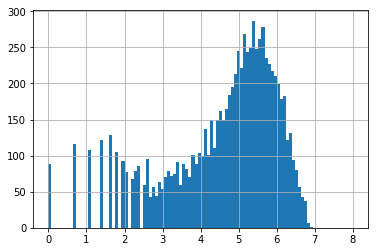

In [271]:
# Look at the bike usages
#data['count'].hist(bins=100,range=(0,1000))
count_series = data['count']
log_count = count_series.apply(np.log)
log_count.hist(bins=100,range=(0,8))

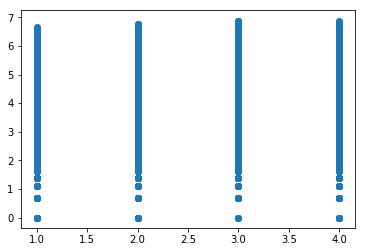

In [272]:
# 1. relation between season and bike usage

#plt.scatter(data['season'], data['count'])
plt.scatter(data['season'], log_count)
plt.show()

,count,mean,std,min,25%,50%,75%,max
1,2127.0,111.514339,120.462934,1.0,23.0,75.0,155.0,782.0
2,2157.0,213.624015,190.236312,1.0,51.0,171.0,316.0,869.0
3,2157.0,234.596198,197.536537,1.0,67.0,196.0,349.0,977.0
4,2159.0,201.277443,178.412502,1.0,51.0,163.0,298.0,948.0


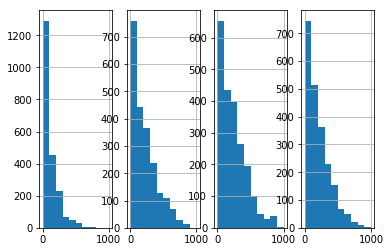

In [120]:
#data['count'].hist()
fig, axes = plt.subplots(1, 4)
season1 = data[data['season']==1]
season2 = data[data['season']==2]
season3 = data[data['season']==3]
season4 = data[data['season']==4]

season1['count'].hist(bins=10,range=(0,1000),ax=axes[0])
season2['count'].hist(bins=10,range=(0,1000), ax=axes[1])
season3['count'].hist(bins=10,range=(0,1000), ax=axes[2])
season4['count'].hist(bins=10,range=(0,1000), ax=axes[3])

series1 = season1['count'].describe()
pd1 = pd.DataFrame(series1).transpose()

series2 = season2['count'].describe()
pd2 = pd.DataFrame(series2).transpose()

series3 = season3['count'].describe()
pd3 = pd.DataFrame(series3).transpose()

series4 = season4['count'].describe()
pd4 = pd.DataFrame(series4).transpose()


pd_all = pd.concat([pd1, pd2, pd3, pd4])
pd_all.index = range(1,5)
pd_all

# Season do not affect the num of bikes usage a lot

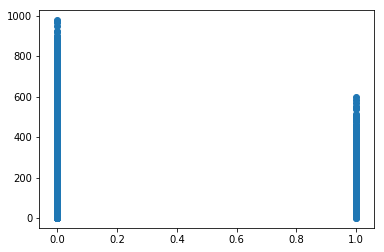

In [50]:
# 2. relation between holiday and bike usage
plt.scatter(data['holiday'], data['count'])
plt.show()

,count,mean,std,min,25%,50%,75%,max
0,8361.0,190.218873,180.973554,1.0,41.0,144.0,281.0,977.0
1,239.0,201.422594,168.201139,3.0,48.0,154.0,355.0,596.0


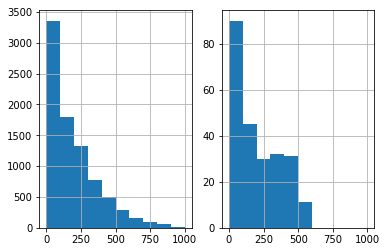

In [131]:
fig, axes = plt.subplots(1, 2)
h0 = data[data['holiday']==0]
h1 = data[data['holiday']==1]

h0['count'].hist(bins=10,range=(0,1000),ax=axes[0])
h1['count'].hist(bins=10,range=(0,1000), ax=axes[1])

sh0 = h0['count'].describe()
fh0 = pd.DataFrame(sh0).transpose()

sh1 = h1['count'].describe()
fh1 = pd.DataFrame(sh1).transpose()

holiday_all = pd.concat([fh0,fh1])
holiday_all.index = range(2)
holiday_all
# The num of bikes used in non-holidays is lesser than that of the holidays. (see mean value)

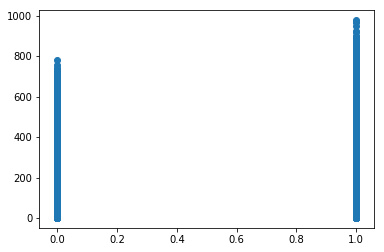

In [51]:
# 3. relation between workingday and bike usage
plt.scatter(data['workingday'], data['count'])
plt.show()

,count,mean,std,min,25%,50%,75%,max
0,2730.0,188.066667,172.104383,1.0,44.0,130.0,303.0,783.0
1,5870.0,191.675980,184.465478,1.0,40.0,148.0,276.0,977.0


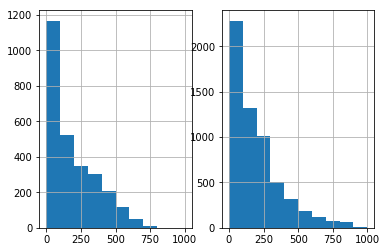

In [132]:
fig, axes = plt.subplots(1, 2)
w0 = data[data['workingday']==0]
w1 = data[data['workingday']==1]

w0['count'].hist(bins=10,range=(0,1000),ax=axes[0])
w1['count'].hist(bins=10,range=(0,1000), ax=axes[1])

sw0 = w0['count'].describe()
fw0 = pd.DataFrame(sw0).transpose()

sw1 = w1['count'].describe()
fw1 = pd.DataFrame(sw1).transpose()

workingday_all = pd.concat([fw0,fw1])
workingday_all.index = range(2)
workingday_all

# When it is a workday, people tend to use the bikes

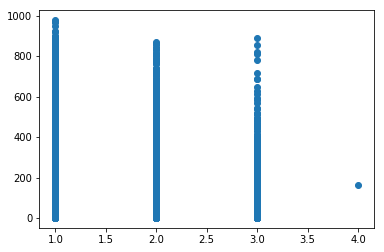

In [52]:
# 4. relation between season and bike usage
plt.scatter(data['weather'], data['count'])
plt.show()

,count,mean,std,min,25%,50%,75%,max
count,1.0,164.0,NaN,164.0,164.0,164.0,164.0,164.0


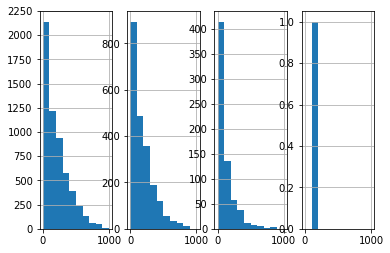

In [642]:
fig, axes = plt.subplots(1, 4)
wht1 = data[data['weather']==1]
wht2 = data[data['weather']==2]
wht3 = data[data['weather']==3]
wht4 = data[data['weather']==4]

wht1['count'].hist(bins=10,range=(0,1000),ax=axes[0])
wht2['count'].hist(bins=10,range=(0,1000), ax=axes[1])
wht3['count'].hist(bins=10,range=(0,1000), ax=axes[2])
wht4['count'].hist(bins=10,range=(0,1000), ax=axes[3])

series1 = wht1['count'].describe()
pd1 = pd.DataFrame(series1).transpose()

series2 = wht2['count'].describe()
pd2 = pd.DataFrame(series2).transpose()

series3 = wht3['count'].describe()
pd3 = pd.DataFrame(series3).transpose()

series4 = wht4['count'].describe()
pd4 = pd.DataFrame(series4).transpose()



pd_all = pd.concat([pd1, pd2, pd3, pd4])
pd_all.index = range(1,5)
#pd_all
pd4

## Remove the severe weather of 4

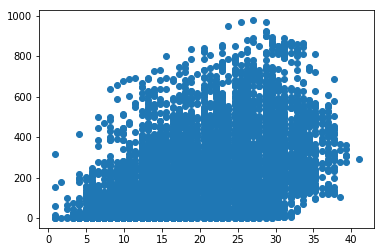

In [850]:
# 5. relation between temperature and bike usage
plt.scatter(data['temp'], data['count'])
plt.show()

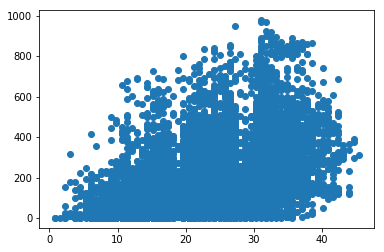

In [54]:
# 6. relation between temperature felt and bike usage
plt.scatter(data['atemp'], data['count'])
plt.show()

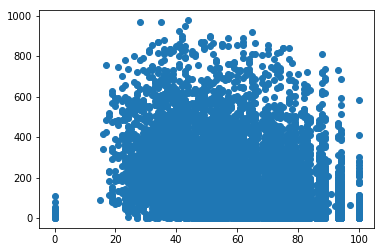

In [57]:
# 7. relation between humidity and bike usage
plt.scatter(data['humidity'], data['count'])
plt.show()

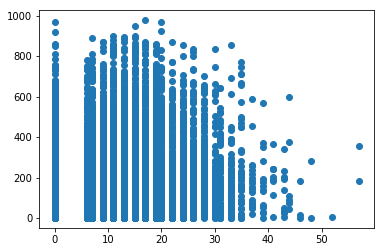

In [58]:
# 8. relation between windspeed and bike usage
plt.scatter(data['windspeed'], data['count'])
plt.show()

In [746]:
# II. Fitting data using the right model with sense obtained above
#data.columns
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [747]:
# 1. Preprocessing Dataset
#print(data.isnull().values.any())

# # time
# data['datetime'] = pd.to_datetime(data.datetime)

# #plt.plot(data['datetime'].dt.month,data['count'])
# plt.plot(data['datetime'],data['count'])


# data['year'] = data.datetime.dt.year
# data['month'] = data.datetime.dt.month
# data['weekday'] = data.datetime.dt.dayofweek
# data['hour'] = data.datetime.dt.hour

# data.head()
#data['atemp']

In [899]:
# Reformat dataset
def reformat(data):
    dc = data.copy(deep=True)
    dc['datetime'] = pd.to_datetime(dc.datetime)
    dc['year'] = dc.datetime.dt.year
    dc['month'] = dc.datetime.dt.month
    dc['weekday'] = dc.datetime.dt.dayofweek
    dc['hour'] = dc.datetime.dt.hour
    dc['weekdayhour'] =  dc['weekday']*dc['hour'] 
    #dc['atemp'] = dc['atemp']**2
    dc['atemp_sqr'] = dc['atemp']**2
    #dc['temp'] = dc['temp']**2
    
    #count~temp+atemp+humidity+windspeed+holiday+workingday+C(season)+C(weather)
    #y,X = dmatrices('count~atemp_sqr+atemp+humidity+windspeed+holiday+C(weather)+C(year)+C(month)+C(weekday)+C(hour)', dc, return_type='dataframe')
    #y,X = dmatrices('count~atemp+humidity+windspeed+holiday+C(weather)+C(year)+C(month)+C(weekday)+C(hour)', dc, return_type='dataframe')
    y,X = dmatrices('count~atemp+humidity+windspeed+holiday+C(weather)+C(year)+C(month)+C(weekdayhour)', dc, return_type='dataframe')
#     X = X.rename(columns = {
#     'C(season)[T.2]': 'Summer',
#     'C(season)[T.3]': 'Autumn',
#     'C(season)[T.4]': 'Winter',
#     'C(weather)[T.2]': 'fog',
#     'C(weather)[T.3]': 'small_rain',
#     'C(weather)[T.4]': 'severe_w'}) 
    return y,X

In [900]:
# Cleaning data
#print(data.isnull().values.any())
# drop severe weather
data = data[data['weather']!=4]
y, X = reformat(data)

y = np.ravel(y)
y_log = np.log(y)
#y_log
#X=X.drop(columns=['severe_w'])
#X=X.drop(columns=['C(weather)[T.4]'])
#C(weather)[T.4]
#X

In [901]:
# 2. Split dataset: 0.8 Training, 0.2 Testing
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
xtrain, xtest, ytrain, ytest = train_test_split(X, y_log, test_size=0.2, random_state=0)
#xtrain
#ytrain

In [898]:
## Loop the alpha for Ridge
test = np.zeros((10,2))
cnt = 0
for i in range(10):
    a = 0.1+ i*0.1
    #par = "alpha="+str(a)
    model = Ridge(a)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtrain)
    RMSLE_train = np.sqrt(((np.log2(np.exp(ytrain) + 1) - np.log2(np.exp(pred) + 1))**2).sum() / len(ytrain))
    
    test[cnt][0] = a
   # test[cnt][1] = model.score(xtrain,ytrain)
    test[cnt][1] = RMSLE_train
    
    cnt +=1

#plt.plot(test[:,0],test[:,1])


In [874]:
s = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag','saga']
test2 = np.zeros((7,2))
cnt2 = 0
for i,j in enumerate(s):
    model = Ridge(solver=j)
    model.fit(xtrain, ytrain)
    pred = model.predict(xtrain)
    RMSLE_train = np.sqrt(((np.log2(np.exp(ytrain) + 1) - np.log2(np.exp(pred) + 1))**2).sum() / len(ytrain))
    
    test2[cnt2][0] = i
    test2[cnt2][1] = RMSLE_train
    
    cnt2 +=1

#plt.plot(test2[:,0],test2[:,1])



In [902]:
# 3. Choose Model and Fit
#model = LogisticRegression()
#model = LinearRegression()
#model = Lasso()
model = Ridge()

#model.fit(X, y)
model.fit(xtrain, ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [903]:
# 4. Fitting results (coefficients, etc)

#pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))
#model.intercept_

In [904]:
# 5. The score, MSE and RMSLE on Training Data

# Score
print(model.score(xtrain,ytrain))

# MSE
pred = model.predict(xtrain)
((pred-ytrain)*(pred-ytrain)).sum() / len(ytrain)
# Relative Error
#(abs(pred-ytrain)/ytrain).sum() / len(ytrain)

# RMSLE
#RMSLE_train = np.sqrt(((np.log2(ytrain + 1) - np.log2(pred + 1))**2).sum() / len(ytrain))
RMSLE_train = np.sqrt(((np.log2(np.exp(ytrain) + 1) - np.log2(np.exp(pred) + 1))**2).sum() / len(ytrain))
RMSLE_train
#print(ytrain.astype(int))
#print(pred.astype(int))

0.5856616858213074


1.316517747095645

In [877]:
# 6. The score on Test Data
#print(metrics.classification_report(ytest, pred))
#print(cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10))

In [878]:
# 7. The score and MSE on Test Data
print(model.score(xtest,ytest))
predtest = model.predict(xtest)
((predtest-ytest)*(predtest-ytest)).sum() / len(ytest)

# RMSLE
RMSLE_test = np.sqrt(((np.log2(np.exp(ytest) + 1) - np.log2(np.exp(predtest) + 1))**2).sum() / len(ytest))
#ytrain**2
RMSLE_test

0.33069957339589195


1.6541815206982953

In [840]:
# Relative Error on Test Data
#(abs(predtest-ytest)/ytest).sum() / len(ytest)

In [841]:
# 8. Use all training data to train
model = LinearRegression()
model.fit(X, y_log)
# Score
print(model.score(X,y_log))

# RMSLE
pred = model.predict(X)
#RMSLE_train = np.sqrt(((np.log2(ytrain + 1) - np.log2(pred + 1))**2).sum() / len(ytrain))
RMSLE_train = np.sqrt(((np.log2(np.exp(y_log) + 1) - np.log2(np.exp(pred) + 1))**2).sum() / len(y_log))
print(RMSLE_train)
print(y.astype(int))
print(np.exp(pred).astype(int))

0.8299089219213247
0.8364659030169412
[ 16  40  32 ... 184 156 119]
[ 17   8   4 ... 228 176 115]


In [842]:
# 9. Predict on real test csv
testset=pd.read_csv('./input/test.csv')
testset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014


In [843]:
# Reformat test dataset
def reformat_test(data):
    dc = data.copy(deep=True)
    dc['datetime'] = pd.to_datetime(dc.datetime)
    dc['year'] = dc.datetime.dt.year
    dc['month'] = dc.datetime.dt.month
    dc['weekday'] = dc.datetime.dt.dayofweek
    dc['hour'] = dc.datetime.dt.hour
    #dc['atemp'] = dc['atemp']**2
    #dc['temp'] = dc['temp']**2
    
    #count~temp+atemp+humidity+windspeed+holiday+workingday+C(season)+C(weather)
    y,X = dmatrices('datetime~atemp+humidity+windspeed+holiday+C(weather)+C(year)+C(month)+C(weekday)+C(hour)', dc, return_type='dataframe')
    return X

In [844]:
test_reform = reformat_test(testset)
#test_reform.head()

In [845]:
#xtrain.head()

In [846]:
result= model.predict(test_reform)
res = np.exp(result).astype(int)
df = pd.DataFrame({"datetime": testset['datetime'],"count": res})
df.to_csv('submission.csv',header=True, index=False)
print(res)

[ 16   8   4 ... 181 149  98]
